In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [96]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## ANALISIS HIPOTESIS 1

In [97]:
sdf1 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/sdf')

#### PODEMOS OBSRVAR QUE LA MAYORIA DE LOS ATAQUES PERTENCECN A LA CATEGORIA 'UNPROVOKED'

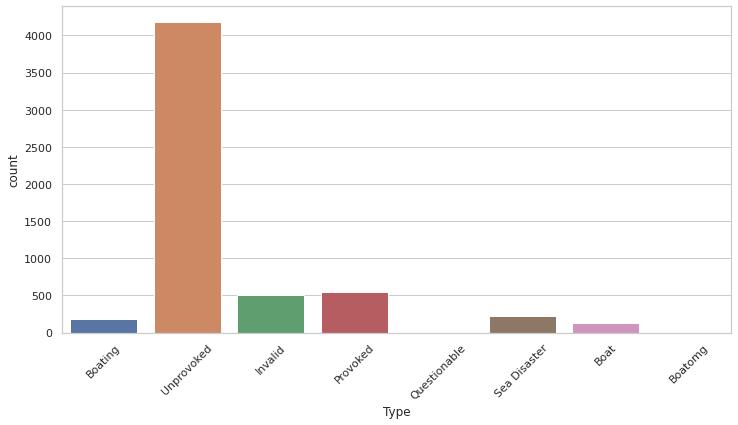

In [98]:
g = sns.countplot(x=sdf1['Type'])
g.tick_params(axis='x', rotation=45);

In [99]:
ataques_mensuales = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/ataques_mensuales')

In [100]:
ataques_mensuales.describe()

,Monthly Attacks
count,12.000000
mean,480.583333
std,89.497037
min,382.000000
25%,408.250000
50%,450.000000
75%,528.000000
max,668.000000


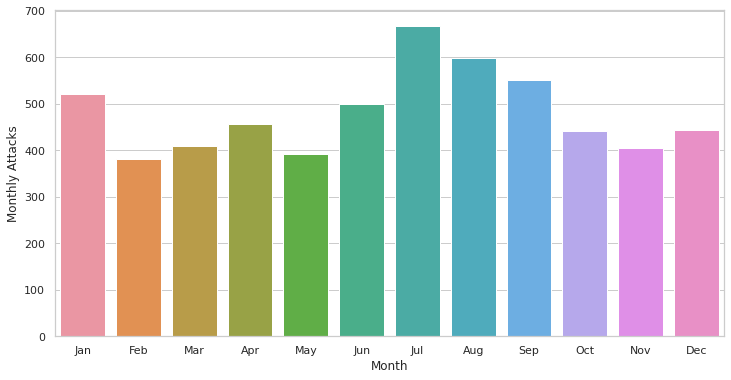

In [101]:
sns.barplot(x='Month', y='Monthly Attacks', data=ataques_mensuales);

### Se puede ver que en los meses de Enero y Julio que corresponden al verano del hemisferio sur y norte respectivamente es cuando más ataques hay.

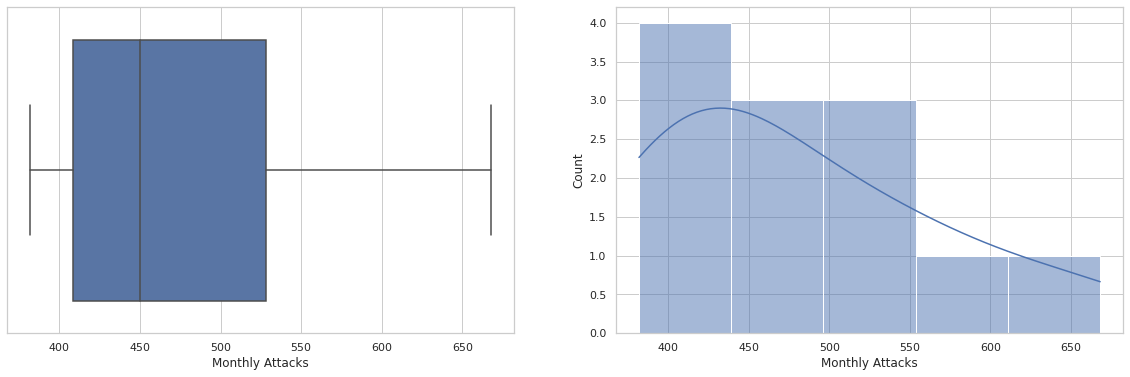

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.boxplot(x='Monthly Attacks', data=ataques_mensuales, ax = ax[0])
sns.histplot(x=ataques_mensuales['Monthly Attacks'], kde=True, ax = ax[1]);


## ANALISIS Y VISUALIZACION HIPOTESIS 2

In [103]:
letal2 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/especies-letalidad')

In [104]:
letal2.describe()

,Cantidad de Muertes
count,8.000000
mean,35.250000
std,49.271116
min,5.000000
25%,5.750000
50%,8.000000
75%,45.250000
max,143.000000


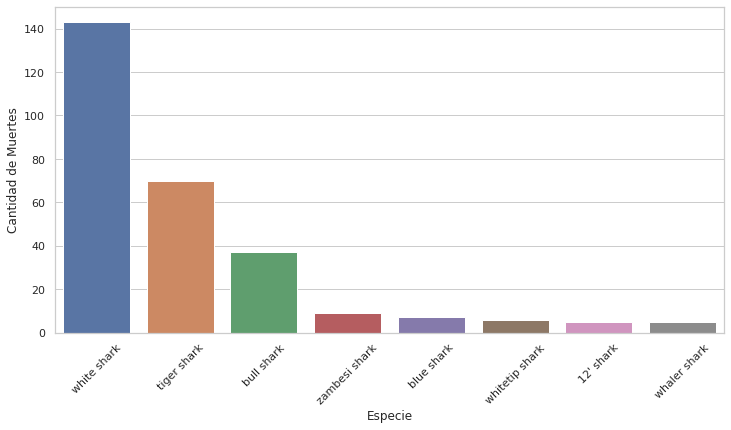

In [105]:
f = sns.barplot(x=letal2.Especie, y=letal2['Cantidad de Muertes'], data=letal2)
f.tick_params(axis='x', rotation=45);

In [106]:
ataques = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/Ataques-especies')

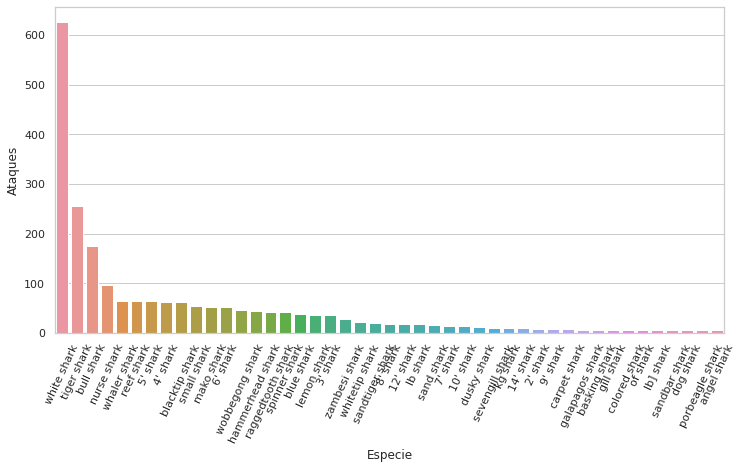

In [107]:
f = sns.barplot(x=ataques.Especie, y=ataques.Ataques, data=ataques)
f.tick_params(axis='x', rotation=65);

### Considerando los ataques de forma general y en los que fueron letales, en particualar, el tiburon blanco, el toro y el tigre son los que màs protagonizaron ataques.

## HIPOTESIS III

In [108]:
actividades = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/actividades-ataques')

In [109]:
actividades.set_index('Actividad', inplace=True)

<AxesSubplot:xlabel='Actividad'>

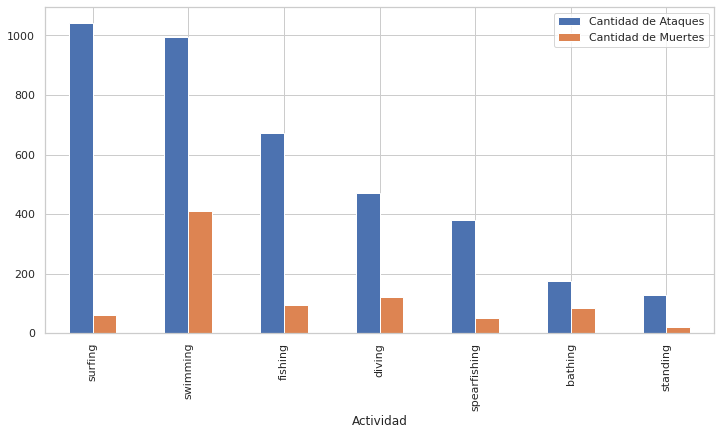

In [110]:
actividades.plot(kind="bar")

#### Podemos observar que hay ciertas actividades, como 'swimming', 'surfing', que si bien registran una cantidad mayor de ataques no letales, la relación con los ataques letales es inversa, por ejemplo 'swimming' registra menos ataques no letales que 'surfing', sin embargo la cantidad de muertes es mucho mayor que en 'surfing'. Algo similar puede verse en 'fishsing' y 'diving', o 'bathing' y 'spearfishing' 